<a href="https://colab.research.google.com/github/iesous-kurios/family_promise_data/blob/master/Hilary_Grant_Data_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This section imports functionality for this page.  
**This allows me to load and clean a raw output of our
Family Promise HMIS data, and also allows me to create graphs
or export data to excel sheets for connection to services
such as Power BI to provide visuals for our metrics**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

This section loads an excel file containing HMIS data

In [0]:
# load excel file containing HMIS data
df = pd.read_excel('/content/2019_Hillary_Data.xlsx')

This section prints out how many total client IDs we served

In [3]:
df['Age at Enrollment'].value_counts().sum()

742

This section prints how many unique client IDs are in the file

In [4]:
uniqueValues = df['5.8 Personal ID'].unique()
 
print('Unique elements in column "5.8 Personal ID" ')
print(len(uniqueValues))

Unique elements in column "5.8 Personal ID" 
671


This section contains code that manually adds up unique client IDs
This allows us to double-check the above assertion of total unique clientIDs

In [0]:
# Python program to check if two  
# to get unique values from list 
# using traversal  
  
# function to get unique values 
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    return unique_list    
    
  
# driver code 
list1 = df['5.8 Personal ID']

unduplicated = unique(list1) 

In [6]:
len(unduplicated)

671

In [7]:
df['5.8 Personal ID'].value_counts().sum()

742

In [0]:
df = df.drop_duplicates(subset='5.8 Personal ID', keep='first')

In [9]:
df['5.8 Personal ID'].value_counts().sum()

671

In [0]:
und_2 = [-1, 0, 1]
two_five = [2, 3, 4, 5]
six_twelve = [6, 7, 8, 9, 10, 11, 12]
thirteen_seventeen = [13, 14, 15, 16, 17]
eighteen_plus = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
                 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
                 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 
                 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
                 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 
                 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
                 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
                 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]

In [0]:
und_2_df = df['Age at Enrollment'].isin(und_2) == True
two_five_df = df['Age at Enrollment'].isin(two_five) == True
six_twelve_df = df['Age at Enrollment'].isin(six_twelve) == True
thirteen_seventeen_df = df['Age at Enrollment'].isin(thirteen_seventeen) == True
eighteen_plus_df = df['Age at Enrollment'].isin(eighteen_plus) == True

In [0]:
a = und_2_df.sum()

In [0]:
b = two_five_df.sum()

In [0]:
c = six_twelve_df.sum()

In [0]:
d = thirteen_seventeen_df.sum()

In [0]:
e = eighteen_plus_df.sum()

<BarContainer object of 5 artists>

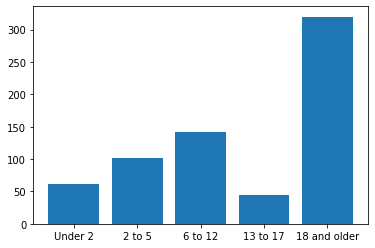

In [17]:
# list of strings 

lst = ['Under 2', '2 to 5', '6 to 12', '13 to 17', '18 and older'] 
  
# list of int 
lst2 = [a, b, c, d, e] 
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
age_breakdown = pd.DataFrame(list(zip(lst, lst2)), 
               columns =['Age Group', 'Total']) 
plt.bar(lst, lst2)


In [18]:
age_breakdown

,Age Group,Total
0,Under 2,62
1,2 to 5,102
2,6 to 12,142
3,13 to 17,45
4,18 and older,320


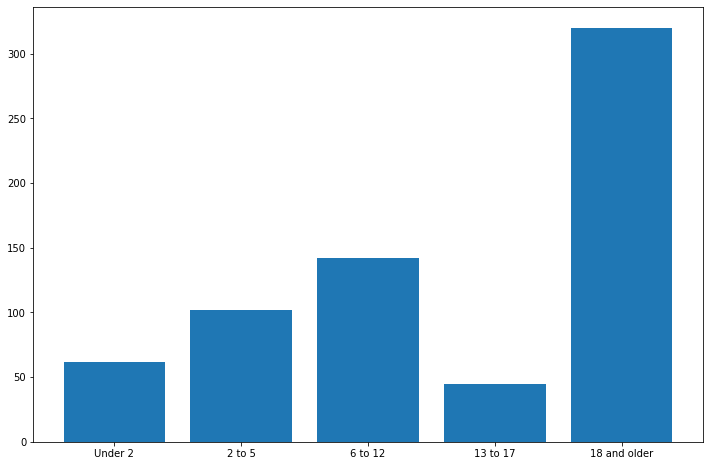

In [19]:
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = plt.bar(lst, lst2)

In [0]:
import plotly.express as px

In [21]:
px.bar(age_breakdown, x='Age Group', y='Total',  text='Total', title='Breakdown of Ages', color='Age Group')

In [0]:
# create error if count of personal ids is not equal to count of unduplicated client ids
assert df['5.8 Personal ID'].value_counts().sum() == len(unduplicated)

In [0]:
# create error if count of personal ids is not equal to the sume of all the different age groups
assert df['5.8 Personal ID'].value_counts().sum() == (und_2_df.sum() + two_five_df.sum() + six_twelve_df.sum() + thirteen_seventeen_df.sum() + eighteen_plus_df.sum())

In [24]:
# print median income of guests
print('Median income of guests for this time period: $',df['4.2 Income Total at Entry'].median())

Median income of guests for this time period: $ 750.0


In [25]:
# print mean income of guests 
print('Mean income of guests for this time period: $',round(df['4.2 Income Total at Entry'].mean(), 2))

Mean income of guests for this time period: $ 965.21


In [26]:
df['3.4 Race'].value_counts(normalize=True)

White                                        0.558867
Black or African American                    0.140089
American Indian or Alaska Native             0.102832
Multi-Racial                                 0.099851
Native Hawaiian or Other Pacific Islander    0.076006
Client refused                               0.019374
Client doesn't know                          0.002981
Name: 3.4 Race, dtype: float64

In [37]:
df['3.4 Race'].value_counts()

White                                        375
Black or African American                     94
American Indian or Alaska Native              69
Multi-Racial                                  67
Native Hawaiian or Other Pacific Islander     51
Client refused                                13
Client doesn't know                            2
Name: 3.4 Race, dtype: int64

In [0]:
white_df = df['3.4 Race'].str.contains('White')
black_df = df['3.4 Race'].str.contains('Black or African American')
am_ind_df = df['3.4 Race'].str.contains('American Indian or Alaska Native')
multi_racial_df = df['3.4 Race'].str.contains('Multi-Racial')
native_amer_df = df['3.4 Race'].str.contains('Native Hawaiian or Other Pacific Islander')
client_refused_df = df['3.4 Race'].str.contains('Client Refused')
client_dnt_knw_df = df['3.4 Race'].str.contains("Client doesn't know")

In [0]:
f = white_df.sum()
g = black_df.sum()
h = am_ind_df.sum()
i = multi_racial_df.sum()
j = native_amer_df.sum()
k = client_refused_df.sum()
l = client_dnt_knw_df.sum()

In [0]:
# list of strings 

lst3 = ['White', 'Black or African American', 'American Indian or Alaska Native',
       'Multi-Racial', 'Native Hawaiian or Other Pacific Islander', 
       'Client refused', "Client doesn't know"] 
  
# list of int 
lst4 = [f, g, h, i, j, k, l] 
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
race_breakdown = pd.DataFrame(list(zip(lst3, lst4)), 
               columns =['Race', 'Total']) 

In [30]:
px.bar(race_breakdown, x='Race', y='Total',  text='Total', title='Breakdown of Races', color='Race')

In [0]:
non_his_lat_df = df['3.5 Ethnicity'].str.contains('Non-Hispanic/Latino')
his_lat_df = df['3.5 Ethnicity'].str.contains('Hispanic/Latino')
cli_ref_df = df['3.5 Ethnicity'].str.contains('Client refused')
cli_dnt_know_df = df['3.5 Ethnicity'].str.contains("Client doesn't know")

In [0]:
m = non_his_lat_df.sum()
n = his_lat_df.sum()
o = cli_ref_df.sum()
p = cli_dnt_know_df.sum()


In [0]:
# list of strings 

lst5 = ['White', 'Black or African American', 'American Indian or Alaska Native',
       'Multi-Racial', 'Native Hawaiian or Other Pacific Islander', 
       'Client refused', "Client doesn't know"] 
  
# list of int 
lst6 = [m, n, o, p] 
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
ethnic_breakdown = pd.DataFrame(list(zip(lst5, lst6)), 
               columns =['Ethnicity', 'Total']) 

In [34]:
px.bar(ethnic_breakdown, x='Ethnicity', y='Total',  text='Total', title='Breakdown of Ethnicity', color='Ethnicity')

In [35]:
df['3.5 Ethnicity'].value_counts(normalize=True)

Non-Hispanic/Latino    0.897168
Hispanic/Latino        0.086438
Client refused         0.013413
Client doesn't know    0.002981
Name: 3.5 Ethnicity, dtype: float64

In [36]:
df['3.5 Ethnicity'].value_counts()

Non-Hispanic/Latino    602
Hispanic/Latino         58
Client refused           9
Client doesn't know      2
Name: 3.5 Ethnicity, dtype: int64

In [38]:
for col in df:
  print(col)

2.1 Organization Name
2.2 Project Name
2.4 ProjectType
2.5 Utilization Tracking Method (Invalid)
2.6 Federal Grant Programs
Enrollment Created By
3.1 FirstName
3.1 LastName
5.8 Personal ID
5.9 Household ID
3.15 Relationship to HoH
3.16 Client Location
CaseMembers
3.10 Enroll Date
3.11 Exit Date
3.12 Exit Destination
3.2 SocSecNo
3.2 Social Security Quality
3.3 Birthdate
3.3 Birthdate Quality
Age at Enrollment
Current Age
3.4 Race
3.5 Ethnicity
3.6 Gender
3.7 Veteran Status
3.8 Disabling Condition at Entry
3.917 Living Situation
3.917b Stayed Less Than 7 Nights
3.917 Stayed Less Than 90 Days
3.917b Stayed in Streets, ES or SH Night Before
3.917 Length of Stay
3.917 Homeless Start Date
Length of Time Homeless (3.917 Approximate Start)
3.917 Times Homeless Last 3 Years
3.917 Total Months Homeless Last 3 Years
V5 Last Permanent Address
V5 Prior Address
V5 State
V5 Zip
Municipality (City or County)
Days Enrolled in Project
RRH In Permanent Housing
RRH Date Of Move-In
Days Enrolled Until RRH

In [0]:
df_zips = pd.read_excel('/content/zipmaster.xlsx')

In [40]:
df_zips

,V5 Zip,City,County,State
0,99105,Benge,Adams,WA
1,99371,Washtucna,Adams,WA
2,99344,Othello,Adams,WA
3,99169,Ritzville,Adams,WA
4,99341,Lind,Adams,WA
...,...,...,...,...
96,99214,Spokane,Spokane,WA
97,99217,Spokane,Spokane,WA
98,99220,Spokane,Spokane,WA
99,99219,Spokane,Spokane,WA


In [0]:
merged = pd.merge(df, df_zips, on='V5 Zip')

In [43]:
merged.shape

(241, 121)

In [44]:
df.shape

(671, 118)

In [45]:
merged.County.value_counts(normalize=True)

Spokane         0.929461
Stevens         0.045643
Pend Oreille    0.012448
Adams           0.012448
Name: County, dtype: float64

In [46]:
merged.County.value_counts()

Spokane         224
Stevens          11
Pend Oreille      3
Adams             3
Name: County, dtype: int64

In [55]:
merged.City.value_counts()

Spokane           182
Veradale           13
Airway Heights     11
Medical Lake        5
Colville            5
Kettle Falls        4
Cheney              4
Deer Park           4
Ritzville           3
Liberty Lake        3
Newport             3
Greenacres          2
Wellpinit           1
Chewelah            1
Name: City, dtype: int64

In [48]:
merged.City.value_counts(normalize=True)

Spokane           0.755187
Veradale          0.053942
Airway Heights    0.045643
Medical Lake      0.020747
Colville          0.020747
Kettle Falls      0.016598
Cheney            0.016598
Deer Park         0.016598
Ritzville         0.012448
Liberty Lake      0.012448
Newport           0.012448
Greenacres        0.008299
Wellpinit         0.004149
Chewelah          0.004149
Name: City, dtype: float64